# Install Tesseract packages
Tesseract is a powerful engine for optical character recognition(OCR). Starting from Tesseract 4.0 an LSTM based powerful OCR engine has been added in the package. The package can be installed from the binaries or build from source. [Here](https://tesseract-ocr.github.io/tessdoc/Home.html) is the documentation of tesseract package.

Python-tesseract is a python wrapper built for the Tesseract package to use it within Python. 

This we will be instaling the Tesseract binary package as well as the python wrapper.

We will also be installing the imagemagick package for image editing

In [ ]:
!apt install -y tesseract-ocr
!pip install pytesseract
!apt install imagemagick

In [ ]:
######## this package is required for preprocessing the image
!pip install deskew

# Import all required libraries

In [ ]:
from google.colab import files
from PIL import Image
import subprocess
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math
from typing import Tuple, Union
from deskew import determine_skew
import pytesseract

# Upload an Image
Upload an image file containing some text

In [71]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving rotated_text.png to rotated_text (1).png


# Display the Image

dpi:  (95.9866, 95.9866)


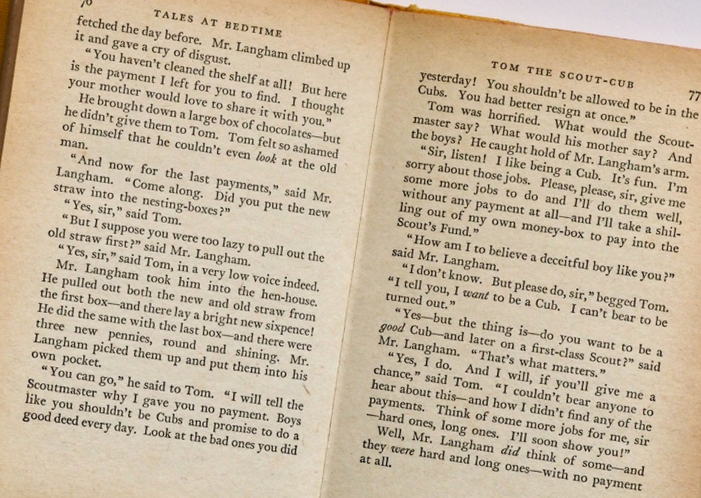

In [15]:
im = Image.open(filename)
print("dpi: ",im.info['dpi'])
from IPython.display import Image
Image(filename)

# Prepocess the Image
The following set of preprocessing can be applied to improve the accuracy of text extraction. 

You can chose to apply any of the following transformations based on your image quality.

- Upscale dpi to 300
- Greyscaling
- Binarization
- Rotation


In [16]:
########### Converting to 300 dpi
subprocess.call('convert -density 300 -units pixelsperinch '+filename+' outfile.png', shell=True)
img = cv2.imread('outfile.png')

0

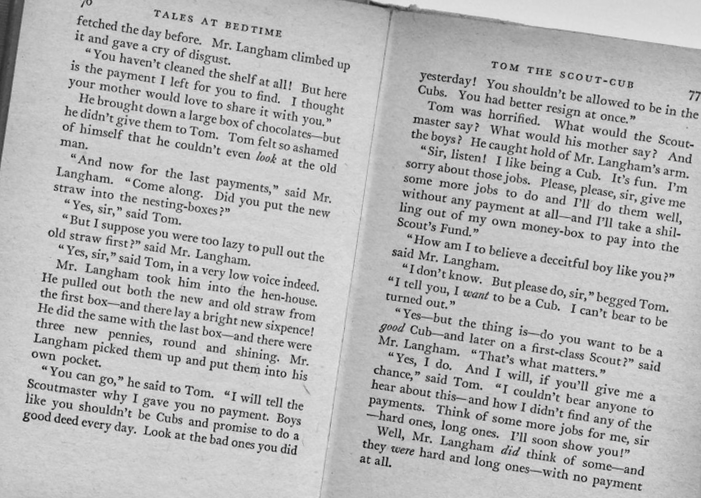

In [34]:
############ Cenverting image to greyscale 
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = get_grayscale(img)#cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#
cv2_imshow(img)

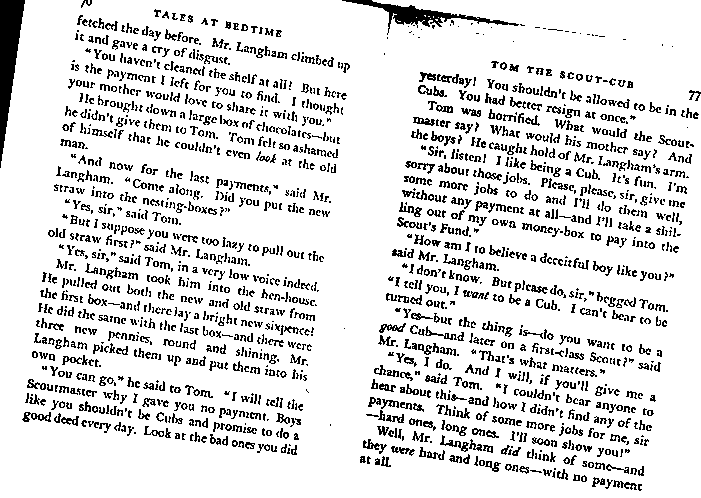

In [35]:
############ Apply Binarization 
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
img = thresholding(img)
cv2_imshow(img)

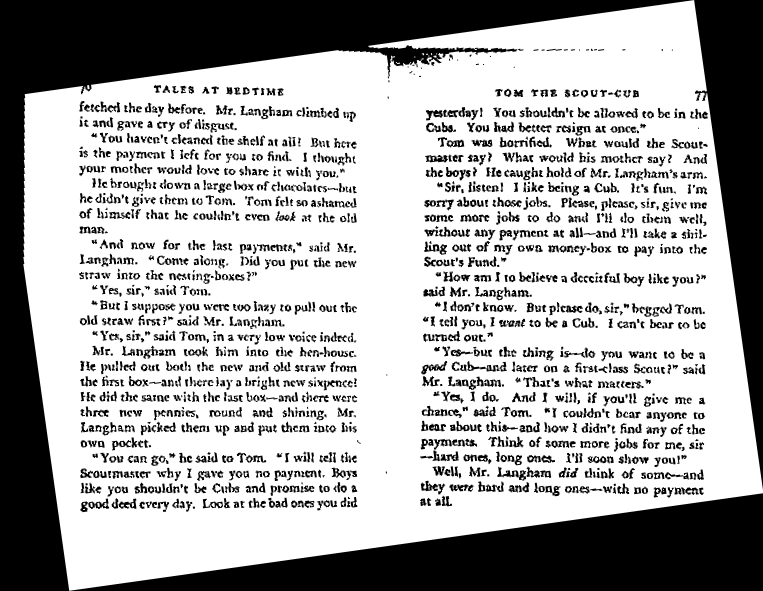

In [36]:
############ Rotate and correct skewness of image
def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

angle = determine_skew(img)
img = rotate(img, angle, (0, 0, 0))
cv2_imshow(img)

# Run OCR

In [41]:
text = pytesseract.image_to_string(img)
print(text)

TALES AT wepTinE.
fetched the day before, Mr. Langham climbed up
ic and gave a cry of disgust.

“You haven't cleancd the shelf at ali! But here
is the payment I left for you zo find. 1 thought
your mother would love to share it with you.”

He broughs down a large box of chocolates~but
hedidn't give them to Tom. ‘Tom felt so asharned.
of himself that he couldn't even Jaok at the old
man.

“And now for the last payments,* said Mr,
Langham. “Come along. Did you put the new
straw into the mesting-boxes?”

“Yes, sir,” said Tom,

“But I suppose you were too lazy to pull out the
old steaw first?” said Mr. Langham.

“Yes, sit,” said Tom, in a very low voice indsed,

Mr. Langham took him into the hen-house.
Ne pulled out both the new and old seraw from
the first box~and there lay a bright new sixpence?
Hee did the same with the fast box—and there were
three new pennies, round and shining, Mi
Langham picked them up and put them into his
own pocket. .

*You can go." he said to Tom. “I will tell t

# Tesseract Configs

### Engine Mode (OEM):
 - 0    Legacy engine only.
 - 1    Neural nets LSTM engine only.
 - 2    Legacy + LSTM engines.
 - 3    Default, based on what is available.

### Page segmentation modes (PSM) :
 - 0    Orientation and script detection (OSD) only.
 -  1    Automatic page segmentation with OSD.
 - 2    Automatic page segmentation, but no OSD, or OCR.
 - 3    Fully automatic page segmentation, but no OSD. (Default)
 -  4    Assume a single column of text of variable sizes.
 - 5    Assume a single uniform block of vertically aligned text.
 - 6    Assume a single uniform block of text.
 - 7    Treat the image as a single text line.
 - 8    Treat the image as a single word.
 - 9    Treat the image as a single word in a circle.
 - 10    Treat the image as a single character.
 - 11    Sparse text. Find as much text as possible in no particular order.
 - 12    Sparse text with OSD.
 - 13    Raw line. Treat the image as a single text line,



In [47]:
######### ruun with custom configs
custom_oem_psm_config = r'--oem 1 --psm 1'
text = pytesseract.image_to_string(img, config=custom_oem_psm_config)
print(text)

TALES AT wepTinE.
fetched the day before, Mr. Langham climbed up
ic and gave a cry of disgust.

“You haven't cleancd the shelf at ali! But here
is the payment I left for you zo find. 1 thought
your mother would love to share it with you.”

He broughs down a large box of chocolates~but
hedidn't give them to Tom. ‘Tom felt so asharned.
of himself that he couldn't even Jaok at the old
man.

“And now for the last payments,* said Mr,
Langham. “Come along. Did you put the new
straw into the mesting-boxes?”

“Yes, sir,” said Tom,

“But I suppose you were too lazy to pull out the
old steaw first?” said Mr. Langham.

“Yes, sit,” said Tom, in a very low voice indsed,

Mr. Langham took him into the hen-house.
Ne pulled out both the new and old seraw from
the first box~and there lay a bright new sixpence?
Hee did the same with the fast box—and there were
three new pennies, round and shining, Mi
Langham picked them up and put them into his
own pocket. .

*You can go." he said to Tom. “I will tell t